In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score


In [283]:
df=pd.read_csv("E:/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [284]:
df.shape

(7043, 21)

In [285]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')  
df.fillna(df.mean(numeric_only=True), inplace=True)       

In [286]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [287]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [288]:
df.isnull().any().sum()

0

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [290]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [291]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [292]:
df.duplicated().sum()

0

In [293]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


# Visualization

<Axes: >

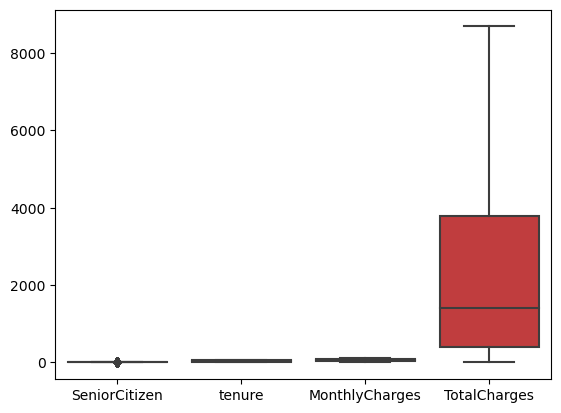

In [294]:
sns.boxplot(df)


In [295]:
import plotly.express as px

fig = px.histogram(df, x='Churn', color='Churn', barmode='group',title='Churn count')

fig.show()


In [296]:
fig = px.histogram(df, x='gender', color='Churn',
                   barmode='group', 
                   title='Churn by Gender')
fig.show()

In [297]:
fig = px.histogram(df, x='Churn', color='SeniorCitizen',
                   barmode='group',
                   title='Churn by Senior Citizen Status',
                   labels={'SeniorCitizen': 'Senior Citizen'})
fig.show()

In [298]:
fig = px.histogram(df, x='Churn', color='Partner', barmode='group',
                   title='Churn by Partner')
fig.show()

In [299]:
import plotly.express as px

fig = px.pie(df, names='Contract', title='Contract Type Distribution')
fig.show()


In [300]:
fig = px.histogram(df, x='PaymentMethod', color='PaymentMethod', barmode='group',
                   title='Customer by payment menthod')
fig.show()

In [301]:
import plotly.express as px

# Aggregate counts
agg_df = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

# Plot
fig = px.bar(agg_df,
             x='PaymentMethod',
             y='Count',
             color='Churn',
             barmode='group',
             title='Payment Method by Churn Status')

fig.show()


In [302]:
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [303]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

corr=df.corr()
fig = px.imshow(
    corr,
    text_auto=True,
    title="Correlation Heatmap for Churn Prediction Features"
)
fig.show()

C:\Users\mohda\AppData\Local\Temp\ipykernel_17044\3247361110.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [304]:
df = pd.get_dummies(df, drop_first=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


<Axes: >

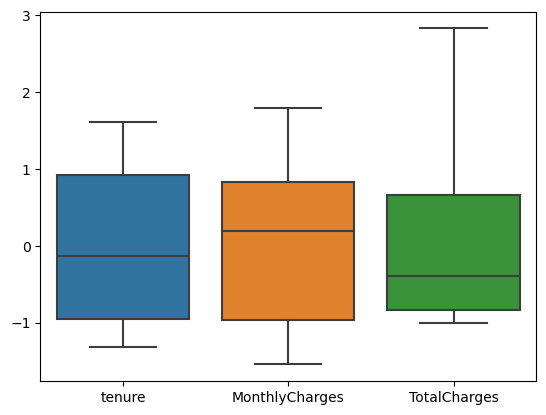

In [306]:
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [307]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]


In [308]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [309]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 30), (1409, 30), (5634, 1), (1409, 1))

In [310]:
logregmodel = LogisticRegression()

In [311]:
logregmodel.fit(X_train, y_train.values.ravel())


LogisticRegression()

In [312]:
model_score = logregmodel.score(X_test, y_test)
print(model_score)

0.8048261178140526


In [313]:
y_predict = logregmodel.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

[[948 118]
 [157 186]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.61      0.54      0.57       343

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.80      0.80      0.80      1409



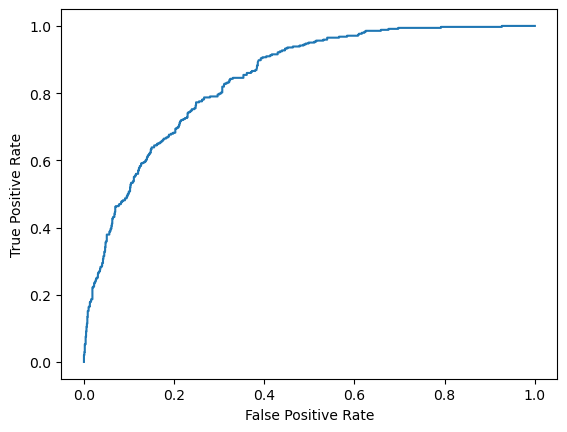

AUC Score: 0.84


In [314]:
y_probs = logregmodel.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(f"AUC Score: {auc:.2f}")

In [315]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())


KNeighborsClassifier()

In [316]:
model_score2 = knn.score(X_test, y_test)
print(model_score2)

0.758694109297374


In [317]:
y_predict2 = knn.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict2))
print(metrics.classification_report(y_test, y_predict2))

[[889 177]
 [163 180]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1066
           1       0.50      0.52      0.51       343

    accuracy                           0.76      1409
   macro avg       0.67      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



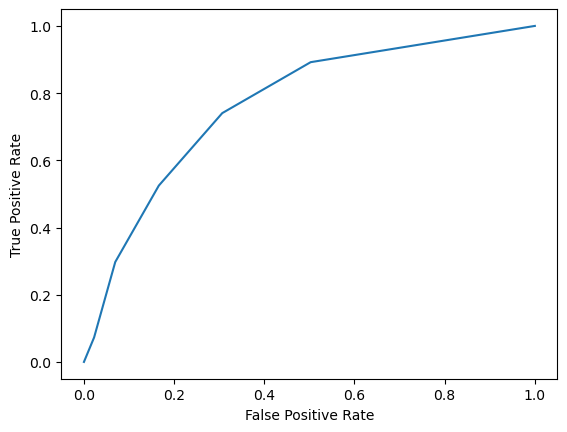

AUC Score: 0.77


In [318]:
y_probs2 = knn.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs2)
auc = roc_auc_score(y_test, y_probs2)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(f"AUC Score: {auc:.2f}")

In [323]:
dtree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
dtree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [324]:
model3=dtree.score(X_test,y_test)
model3

0.7466288147622427

In [325]:
y_predict3 = dtree.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict3))
print(metrics.classification_report(y_test, y_predict3))

[[882 184]
 [173 170]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1066
           1       0.48      0.50      0.49       343

    accuracy                           0.75      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.75      0.75      0.75      1409



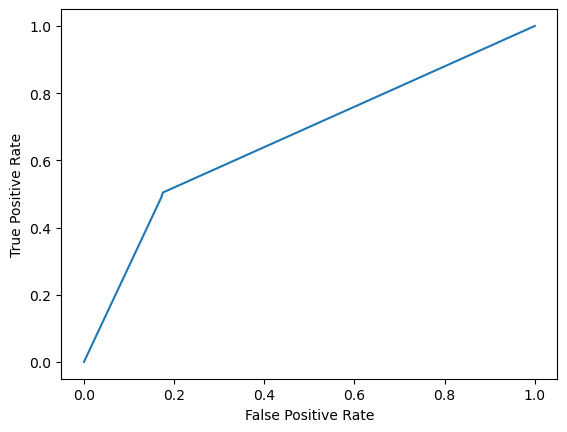

AUC Score: 0.66


In [326]:
y_probs3 = dtree.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs3)
auc = roc_auc_score(y_test, y_probs3)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(f"AUC Score: {auc:.2f}")

# Conclusion: Logistic Regression is the best model based on ROC AUC.